# Evaluating a trained Model

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

## Import Tensorflow and Numpy for loading the Model and interacting with data

In [2]:
import tensorflow as tf
import numpy as np

## Import self written Utils for visualizing data

In [3]:
from utils import *

## Import functions needed to load the Dataset

In [4]:
from train_models import get_sensor_names, get_data

## Import OS and Json for loading the Config File

In [5]:
import os
import json

## Define Constants

In [6]:
model_path = './finalModels/smallGRU'
num_datapoints = 3000

In [7]:
sensors = get_sensor_names()

num_input = len(sensors)

sensors

['co2Indoor',
 'humidityIndoor',
 'humidityOutdoor',
 'temperatureIndoor',
 'temperatureOutdoor']

## Load the model's Config file

In [8]:
with open(os.path.join(model_path, 'config.json')) as json_data_file:
    data = json.load(json_data_file)
batch_size = int(data['batch_size'])
time_steps = int(data['time_steps'])
min_x = np.array(data['min_x'])
max_x = np.array(data['max_x'])

## Load Sensor Data

In [9]:
X, Y = get_data(time_steps, sensors, num_datapoints)

## Scale Data

In [10]:
def scale_data(x, min_x, max_x):
    nom = (x-min_x)*2
    denom = max_x - min_x
    denom[denom==0] = 1
    return -1 + nom/denom

In [11]:
X = scale_data(X, min_x, max_x)

## Load the Model

In [12]:
model = tf.keras.models.load_model(os.path.join(model_path, 'model.h5'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               32100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 34,141
Trainable params: 34,141
Non-trainable params: 0
_________________________________________________________________


## Evaluate the Model

In [13]:
eval_results = model.evaluate(X, Y, batch_size=batch_size)
results = { metric: value for metric, value in zip(model.metrics_names, eval_results)}

3000/3000 [==============================] - 0s 118us/sample - loss: 1.0179 - tp: 1565.0000 - fp: 881.0000 - tn: 531.0000 - fn: 23.0000 - accuracy: 0.6987 - precision: 0.6398 - recall: 0.9855 - auc: 0.7140 - binary_crossentropy: 1.0171


## Plot Confusion Matrix

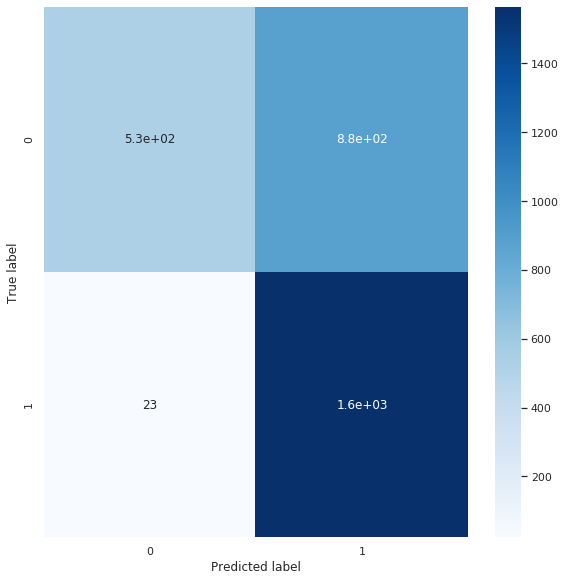

In [14]:
plot_confusion_matrix(results)

## Recall

In [15]:
print('Recall = {}'.format(results['recall']))

Recall = 0.985516369342804
